In [1]:
from miniautoml import train_binary_classifier
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [3]:
import datetime

current_time = datetime.datetime.now()
print(current_time.strftime("%D:%H:%M:%S"))

06/03/25:15:15:08


In [4]:
bdb = pd.read_csv("../BindingDB/filtered_bdb_new_subclasses_3_14_25.csv")

In [5]:
bdb_smiles = bdb["Ligand SMILES"].tolist()

In [6]:
bdb_classes = bdb["Sub_Class"].tolist()
bdb_types = set(bdb_classes)

In [7]:
bdb_class_to_indices = {x:list() for x in bdb_types}
for i, val in enumerate(bdb_classes):
    bdb_class_to_indices[val].append(i)

In [8]:
embeddings = np.load("../BindingDB/final_bdb_embed.npy").tolist()

In [7]:
pca = PCA(n_components=32, random_state=1)
pca.fit(embeddings)
embeddings = pca.transform(embeddings)

In [9]:
bdb_total = {x:0 for x in bdb_types}
for x in bdb_classes:
    bdb_total[x] += 1
order = sorted(bdb_total.items(), key=lambda x: -x[1])

In [ ]:
classes_of_interest = ["USP30", "ACC2", "] #[x[0] for x in order if x[1] >= 100]
ligands_of_interest = [bdb_class_to_indices[coi] for coi in classes_of_interest]
ligands_other = [sorted(random.sample(list(set(range(len(bdb_smiles)))-set(loi)), 50)) for loi in ligands_of_interest]
ligands_of_interest = [random.sample(loi, 50) for loi in ligands_of_interest]

In [10]:
classes_of_interest = [x[0] for x in order if x[1] >= 100]
ligands_of_interest = [bdb_class_to_indices[coi] for coi in classes_of_interest]
ligands_other = [sorted(random.sample(list(set(range(len(bdb_smiles)))-set(loi)), min(len(loi), 512))) for loi in ligands_of_interest]
ligands_of_interest = [random.sample(loi, 512) if len(loi) > 512 else loi for loi in ligands_of_interest]

In [9]:
classes_of_interest = [x[0] for x in order if x[1] >= 100]
ligands_of_interest = [bdb_class_to_indices[coi] for coi in classes_of_interest]
ligands_of_interest = [random.sample(loi, 200) if len(loi) > 200 else loi for loi in ligands_of_interest]
ligands_other = [sorted(random.sample(list(set(range(len(bdb_smiles)))-set(loi)), min(4*len(loi), 800))) for loi in ligands_of_interest]

In [8]:
classes_of_interest = [x[0] for x in order if x[1] >= 100]
ligands_of_interest = [bdb_class_to_indices[coi] for coi in classes_of_interest]
ligands_other = [sorted(random.sample(list(set(range(len(bdb_smiles)))-set(loi)), 900)) for loi in ligands_of_interest]
ligands_of_interest = [random.sample(loi, 100) for loi in ligands_of_interest]

In [8]:
classes_of_interest = [x[0] for x in order if x[1] >= 100]
ligands_of_interest = [bdb_class_to_indices[coi] for coi in classes_of_interest]
ligands_other = [sorted(random.sample(list(set(range(len(bdb_smiles)))-set(loi)), 9900)) for loi in ligands_of_interest]
ligands_of_interest = [random.sample(loi, 100) for loi in ligands_of_interest]

In [9]:
len(classes_of_interest)

1

In [16]:
Xs = []
Ys = []
for n in range(len(classes_of_interest)):
    X = []
    Y = []
    for i in ligands_of_interest[n]:
        X.append(embeddings[i])
        Y.append(1)
    for i in ligands_other[n]:
        X.append(embeddings[i])
        Y.append(0)
    Xs.append(X)
    Ys.append(Y)

In [17]:
[len(x) for x in Xs]

[100]

In [18]:
filteredXs = [np.array(x) for x in Xs]
filteredYs = [np.array(y) for y in Ys]

In [19]:
mdls = []
#for i in range(len(filteredXs)):
for i in range(0,1):
    print(f"Class {i+1}: {classes_of_interest[i]}")
    mdl = train_binary_classifier(filteredXs[i], filteredYs[i], n_splits=1)
    mdls.append(mdl)

Class 1: CA2


In [16]:
scores = [sum(x.validation_metrics['aucs']) for x in mdls]

In [20]:
mdl.validation_metrics

{'aucs': [0.78],
 'positives': 50,
 'fprs': [array([0. , 0. , 0. , 0.1, 0.1, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 1. ])],
 'tprs': [array([0. , 0.1, 0.4, 0.4, 0.6, 0.6, 0.7, 0.7, 0.9, 0.9, 1. , 1. ])],
 'n_splits': 1,
 'test_size': 0.2}

In [19]:
scores

[0.5700000000000001]

In [17]:
data = [(classes_of_interest[i], scores[i]) for i in range(len(scores))]
data = sorted(data, key=lambda x: -x[1])

In [18]:
len(data)

1

In [19]:
data

[('DRD2', 0.8925)]

In [20]:
counts = [min(512, len(bdb_class_to_indices[x[0]])) for x in data]

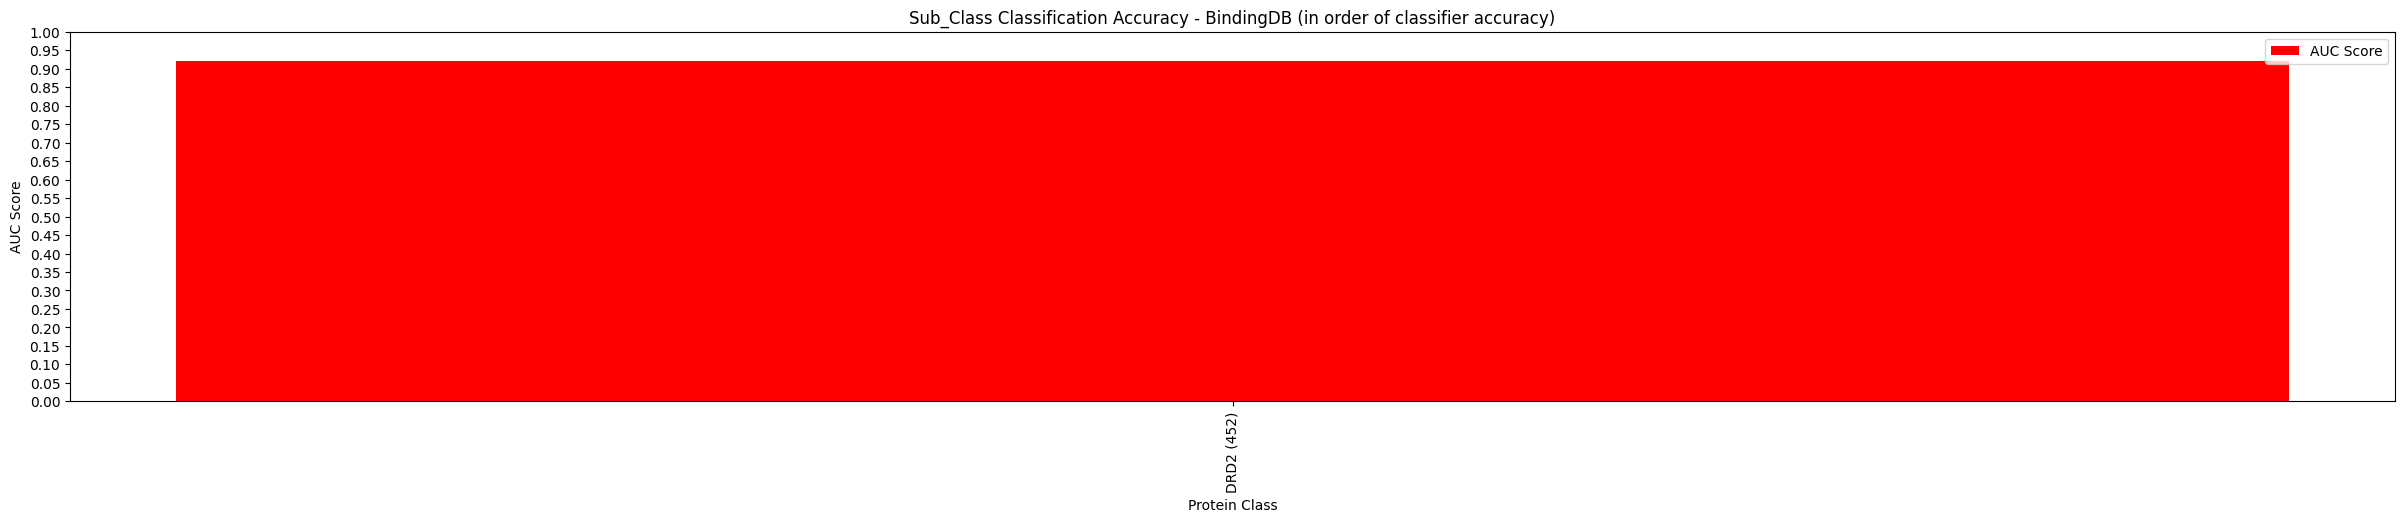

In [23]:
fig = plt.figure()
fig.set_figwidth(30)

plt.bar([x[0] + f" ({min(512, len(bdb_class_to_indices[x[0]]))})" for x in data],[x[1] for x in data],label="AUC Score",color="red")

plt.xlabel("Protein Class")
plt.ylabel("AUC Score")
plt.title("Sub_Class Classification Accuracy - BindingDB (in order of classifier accuracy)")
plt.xticks(rotation=90, ha='center')
plt.yticks(np.arange(0, 1.05, 0.05))

plt.legend()
plt.show()

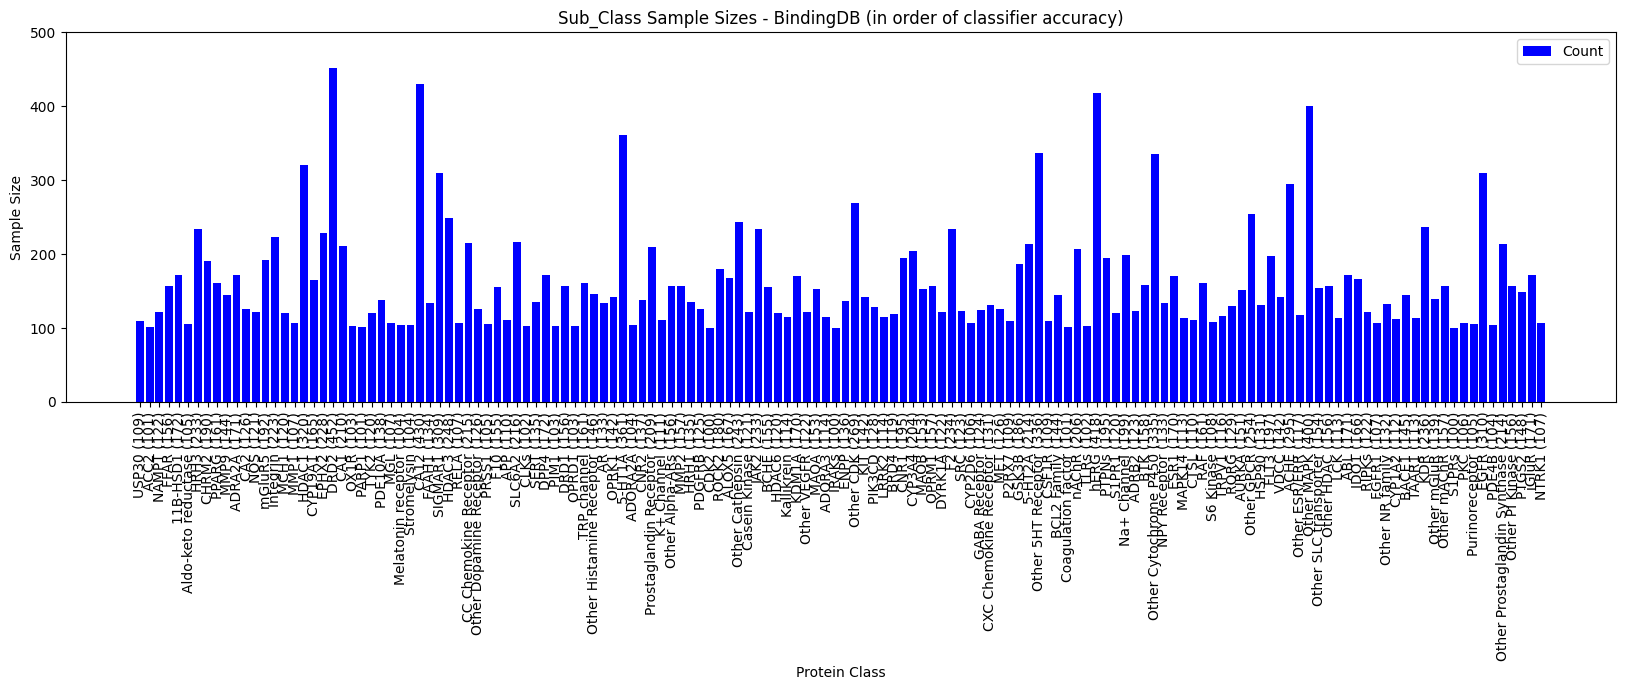

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figwidth(20)

plt.bar([x[0] + f" ({min(512, len(bdb_class_to_indices[x[0]]))})" for x in data],counts,label="Count",color="blue")

plt.xlabel("Protein Class")
plt.ylabel("Sample Size")
plt.title("Sub_Class Sample Sizes - BindingDB (in order of classifier accuracy)")
plt.xticks(rotation=90, ha='center')
plt.yticks(np.arange(0, 550, 100))

plt.legend()
plt.show()

In [21]:
best_data = [x for x in data if x[1] > 0.9]

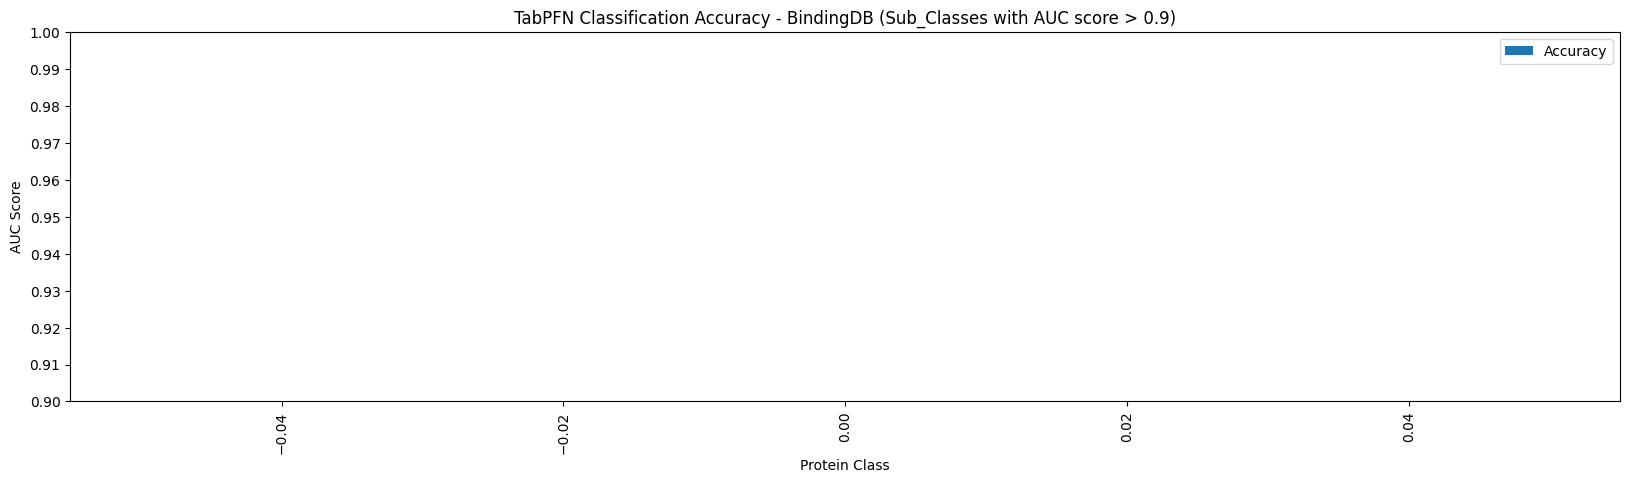

In [22]:
fig = plt.figure()
fig.set_figwidth(20)

plt.bar([x[0] + f" ({min(512, len(bdb_class_to_indices[x[0]]))})" for x in best_data],[x[1] for x in best_data],label="Accuracy",color="red")

plt.xlabel("Protein Class")
plt.ylabel("AUC Score")
plt.title("TabPFN Classification Accuracy - BindingDB (Sub_Classes with AUC score > 0.9)")
plt.xticks(rotation=90, ha='center')
plt.yticks(np.arange(0.9, 1.01, 0.01))
ax = plt.gca()
ax.set_ylim([0.9, 1])

for i in range(len(best_data)):
    plt.text(i, best_data[i][1]+0.002, np.round(best_data[i][1], 3), ha='center')

plt.legend()
plt.show()

In [23]:
indices = [classes_of_interest.index(x[0]) for x in data]
indices

[0]

IndexError: list index out of range

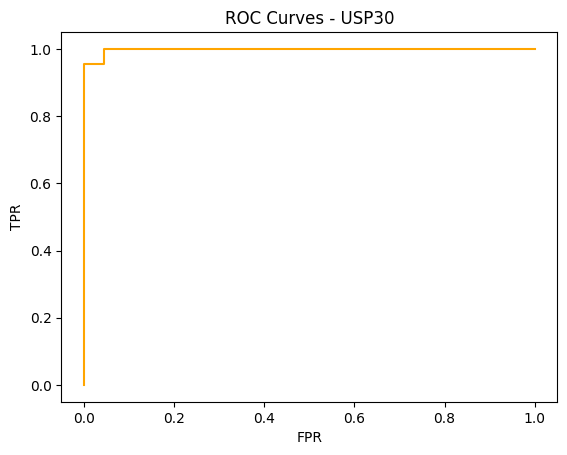

In [29]:
index = indices[0]
fig = plt.figure()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title(f"ROC Curves - {classes_of_interest[index]}")
for i in range(5):
    plt.plot(mdls[index].validation_metrics['fprs'][i], mdls[index].validation_metrics['tprs'][i], color="orange")
ax = plt.gca()
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
ax.axline((1, 1), slope=1, color = "gray", linestyle="dashed")
plt.show()

In [30]:
[x[0] for x in best_data]

['USP30',
 'ACC2',
 'NAMPT',
 'FFAR',
 '11B-HSD1',
 'Aldo-keto reductase',
 'HRH3',
 'CHRM2',
 'PPARG',
 'MMP9',
 'ADRA2A',
 'CA2',
 'NOS',
 'mGluR5',
 'Integrin',
 'MCH1',
 'MMP1',
 'HDAC1',
 'CYP19A1',
 'EPHX2',
 'DRD2',
 'CA1',
 'OX1R',
 'PARP1',
 'TYK2',
 'PDE10A',
 'MGL',
 'Melatonin receptor',
 'Stromelysin']

In [192]:
indices

[119,
 95,
 1,
 141,
 74,
 7,
 21,
 133,
 18,
 128,
 100,
 77,
 56,
 26,
 134,
 125,
 87,
 13,
 4,
 20,
 25,
 98,
 75,
 79,
 66,
 0,
 48,
 59,
 123,
 33,
 37,
 80,
 9,
 78,
 50,
 124,
 137,
 101,
 41,
 53,
 38,
 16,
 68,
 42,
 57,
 85,
 136,
 31,
 116,
 19,
 52,
 105,
 112,
 109,
 118,
 46,
 88,
 107,
 27,
 34,
 5,
 131,
 63,
 129,
 22,
 71,
 43,
 62,
 54,
 126,
 23,
 106,
 104,
 70,
 97,
 45,
 142,
 32,
 84,
 81,
 90,
 65,
 14,
 145,
 93,
 72,
 86,
 6,
 15,
 117,
 91,
 110,
 17,
 55,
 51,
 135,
 96,
 99,
 89,
 44,
 76,
 36,
 143,
 60,
 144,
 102,
 108,
 10,
 103,
 2,
 121,
 58,
 69,
 61,
 35,
 29,
 73,
 115,
 120,
 47,
 39,
 49,
 94,
 3,
 40,
 67,
 30,
 138,
 127,
 122,
 114,
 11,
 111,
 24,
 113,
 83,
 130,
 132,
 8,
 139,
 140,
 64,
 28,
 92,
 12,
 82]

In [193]:
[x[0] for x in best_data]

['USP30',
 'NAMPT',
 'CA12',
 'ACC2',
 'PDE10A',
 'HDAC1',
 'SLC6A2',
 'Melatonin receptor',
 'HRH3',
 'Aldo-keto reductase',
 'MCH1',
 'HRH1',
 'FFAR',
 'Prostaglandin Receptor',
 'Stromelysin',
 'RELA',
 'CA2',
 'HDAC3',
 '5-HT1A',
 'Integrin']

In [19]:
len(indices)

1

In [24]:
test = mdls[0]

In [21]:
test.predict(embeddings[0:1])

KeyboardInterrupt: 

In [ ]:
predictions = []
names = []
count = 1
batch_size = 1024
for i in indices:
    names.append(classes_of_interest[i])
    print(f"{count} " + names[-1])
    count += 1
    batch_predictions = []
    for j in range(0, len(embeddings)//batch_size+1):
        batch_predictions.append(mdls[i].predict(embeddings[batch_size*j:batch_size*(j+1)]))
        print((j+1)*(batch_size))
    predictions.append(np.concatenate(batch_predictions))

1 DRD2
1024
2048
3072
4096
5120
6144
7168
8192
9216
10240
11264
12288
13312
14336
15360
16384
17408
18432
19456
20480
21504
22528
23552
24576
25600
26624
27648
28672
29696
30720
31744
32768
33792
34816
35840
36864
37888
38912
39936
40960


In [28]:
ca12_predictions = np.concatenate(predictions)

In [29]:
len(ca12_predictions)

40748

In [21]:
bdb

,Ligand SMILES,Ligand InChI,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,Sub_Class
0,Cc1ccc(COc2ccc3nc([C@@H]4[C@H](C(O)=O)C4(C)C)n...,InChI=1S/C27H25BrFN3O3/c1-15-4-7-18(30-12-15)1...,Arachidonate 5-lipoxygenase activating protein,A0A087WW23,Arachidonate
1,COC(=O)c1nn(C(=O)c2cccc(C)c2)c2ccc(cc12)[N+]([...,InChI=1S/C17H13N3O5/c1-10-4-3-5-11(8-10)16(21)...,Chymotrypsinogen B,A0A2R8YG87,Chymotrypsinogen
2,[CH2][C@H]1C[C@H](C[C@@H]1O)n1ccc2c(ncnc12)-c1...,InChI=1S/C21H21N4O2/c1-12-7-14(10-19(12)26)25-...,Ubiquitin-like modifier-activating enzyme 6,A0AVT1,Ubiquitin-like
3,NS(=O)(=O)OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1cn...,"InChI=1S/C19H22N6O6S/c20-32(28,29)30-7-13-15(2...",Ubiquitin-like modifier-activating enzyme 6,A0AVT1,Ubiquitin-like
4,Nc1ncnc2n(cnc12)[C@@H]1O[C@H](COP(O)(=O)OP(O)(...,InChI=1S/C15H23N5O14P2/c16-12-7-13(18-3-17-12)...,ADP-ribose glycohydrolase MACROD2,A1Z1Q3,ADP-ribose
...,...,...,...,...,...
40743,CN(C)c1ccc(\C=C\c2nc3ccccc3s2)cc1,InChI=1S/C17H16N2S/c1-19(2)14-10-7-13(8-11-14)...,Nuclear receptor coactivator 3,Q9Y6Q9,Nuclear coactivator
40744,ClCC(=O)N(C(C(=O)NC1CCCCC1)c1cccnc1)c1cccc(Cl)c1,InChI=1S/C21H23Cl2N3O2/c22-13-19(27)26(18-10-4...,Nuclear receptor coactivator 3,Q9Y6Q9,Nuclear coactivator
40745,N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CO)C(=O)N[C@@H]...,InChI=1S/C20H28N4O9/c21-12(8-11-4-2-1-3-5-11)1...,Lymphocyte antigen 96,Q9Y6Y9,Lymphocyte
40746,Cl.Cl.Cl.Cl.CC(C)(C)c1cc2Cc3cc(cc(Cc4cc(cc(Cc5...,"InChI=1S/C64H100N12O4/c1-61(2,3)49-33-41-29-43...",Lymphocyte antigen 96,Q9Y6Y9,Lymphocyte


In [30]:
names

['DRD2']

[array([0.03642656, 0.84394014, 0.04409177, ..., 0.18769124, 0.0461402 ,
        0.00223124], dtype=float32)]

In [25]:
for i in range(len(names)):
    bdb[names[i]] = predictions[i]

ValueError: Length of values (39936) does not match length of index (40748)

In [19]:
from sklearn.metrics import roc_auc_score

In [28]:
len(predictions[0])

39936

In [32]:
sum(pca.explained_variance_ratio_)

0.9091889084514874

In [33]:
auc_score = roc_auc_score([1 if x == "CA12" else 0 for x in bdb_classes], ca12_predictions)

In [34]:
auc_score

0.8994107600390846

In [1]:
len(bdb_classes)

NameError: name 'bdb_classes' is not defined

In [53]:
name = "CA12"
cutoff = len(embeddings) // 100 #len(bdb_class_to_indices["CA12"])
correct = len([x for x in sorted(range(len(bdb_classes)), key=lambda i: ca12_predictions[i])[-cutoff:] if bdb_classes[x] == name])
correct*len(bdb_classes)/(cutoff*len(bdb_class_to_indices["CA12"]))

16.763933489514883

In [48]:
len(bdb_class_to_indices["CA12"])

430

In [46]:
len(embeddings)

40748

In [ ]:
fullAUCs = []
for name in names:
    fullAUCs.append((name, roc_auc_score([1 if x == name else 0 for x in bdb_classes[:39936]], bdb[name])))
fullAUCs

[('USP30', 0.5634230552248924),
 ('NAMPT', 0.7312735000520543),
 ('CA12', 0.5997231024979321),
 ('ACC2', 0.5226330441738543),
 ('PDE10A', 0.30023464628188246),
 ('HDAC1', 0.7056341675324033),
 ('SLC6A2', 0.3903059219784276),
 ('Melatonin receptor', 0.4954068818938172),
 ('HRH3', 0.5490028331582802),
 ('Aldo-keto reductase', 0.5394538742101669),
 ('MCH1', 0.6706697556693249),
 ('HRH1', 0.357095110031362),
 ('FFAR', 0.6871198884711399),
 ('Prostaglandin Receptor', 0.3889191234242978),
 ('Stromelysin', 0.7572302279454626),
 ('RELA', 0.696717807416524),
 ('CA2', 0.592067555855651),
 ('HDAC3', 0.5216797590601354),
 ('5-HT1A', 0.5431444541375214),
 ('Integrin', 0.26618170149080317),
 ('CA1', 0.3792368242378109),
 ('NOS', 0.5893725359127902),
 ('CNR2', 0.6646355568328814),
 ('FAAH1', 0.4398467663161515),
 ('Other Histamine Receptor', 0.38402310635888776),
 ('DRD2', 0.22972020323939132),
 ('PPARG', 0.3550175246579428),
 ('F10', 0.33265849904202455),
 ('MMP1', 0.6188189404972235),
 ('mGluR5', 0

In [219]:
data

[('USP30', 0.9743801652892563),
 ('NAMPT', 0.9613333333333334),
 ('CA12', 0.952974580854516),
 ('ACC2', 0.9495238095238095),
 ('PDE10A', 0.948469387755102),
 ('HDAC1', 0.9416259765625),
 ('SLC6A2', 0.9374207188160677),
 ('Melatonin receptor', 0.9346938775510203),
 ('HRH3', 0.9332729741964692),
 ('Aldo-keto reductase', 0.9310657596371883),
 ('MCH1', 0.9263888888888889),
 ('HRH1', 0.924554183813443),
 ('FFAR', 0.9171370967741936),
 ('Prostaglandin Receptor', 0.9154195011337869),
 ('Stromelysin', 0.9120181405895691),
 ('RELA', 0.90995670995671),
 ('CA2', 0.9092307692307692),
 ('HDAC3', 0.90744),
 ('5-HT1A', 0.9024543378995432),
 ('Integrin', 0.9014320987654321),
 ('CA1', 0.9),
 ('NOS', 0.8976666666666666),
 ('CNR2', 0.8925925925925926),
 ('FAAH1', 0.8916323731138546),
 ('Other Histamine Receptor', 0.888735632183908),
 ('DRD2', 0.8886202686202687),
 ('PPARG', 0.8850378787878789),
 ('F10', 0.8842872008324661),
 ('MMP1', 0.8835497835497836),
 ('mGluR5', 0.8832658569500677),
 ('11B-HSD1', 0.8

In [216]:
fullAUCs = sorted(fullAUCs, key=lambda x: -x[1])
fullAUCs

[('IRAKs', 0.9606659614249164),
 ('Stromelysin', 0.7572302279454626),
 ('ADORA2A', 0.7558490987410386),
 ('NAMPT', 0.7312735000520543),
 ('SRC', 0.7147184990619136),
 ('CLKs', 0.7106169191093255),
 ('Other MAPK', 0.7075588009318925),
 ('HDAC1', 0.7056341675324033),
 ('CSF1R', 0.7046332769782542),
 ('NTRK1', 0.6985943939951068),
 ('FGFR1', 0.6969442027950689),
 ('TYK2', 0.6968875118965574),
 ('RELA', 0.696717807416524),
 ('Other PI Kinase', 0.6946846132369142),
 ('GSK3B', 0.6931501516595066),
 ('BRD4', 0.6929368660999067),
 ('BTK', 0.6914838411905408),
 ('PDGFRB', 0.6898679073431307),
 ('RAF', 0.6889982671990404),
 ('FFAR', 0.6871198884711399),
 ('CC Chemokine Receptor', 0.6869999695912432),
 ('TRPV1', 0.6822953795547589),
 ('Kallikrein', 0.6753538649251469),
 ('PIK3CD', 0.6738440885032004),
 ('AURKA', 0.6722652817297856),
 ('ABL', 0.6710370305996816),
 ('MCH1', 0.6706697556693249),
 ('mGluR5', 0.6688311121247986),
 ('PDE4B', 0.6653348635052576),
 ('CNR2', 0.6646355568328814),
 ('MMP9',

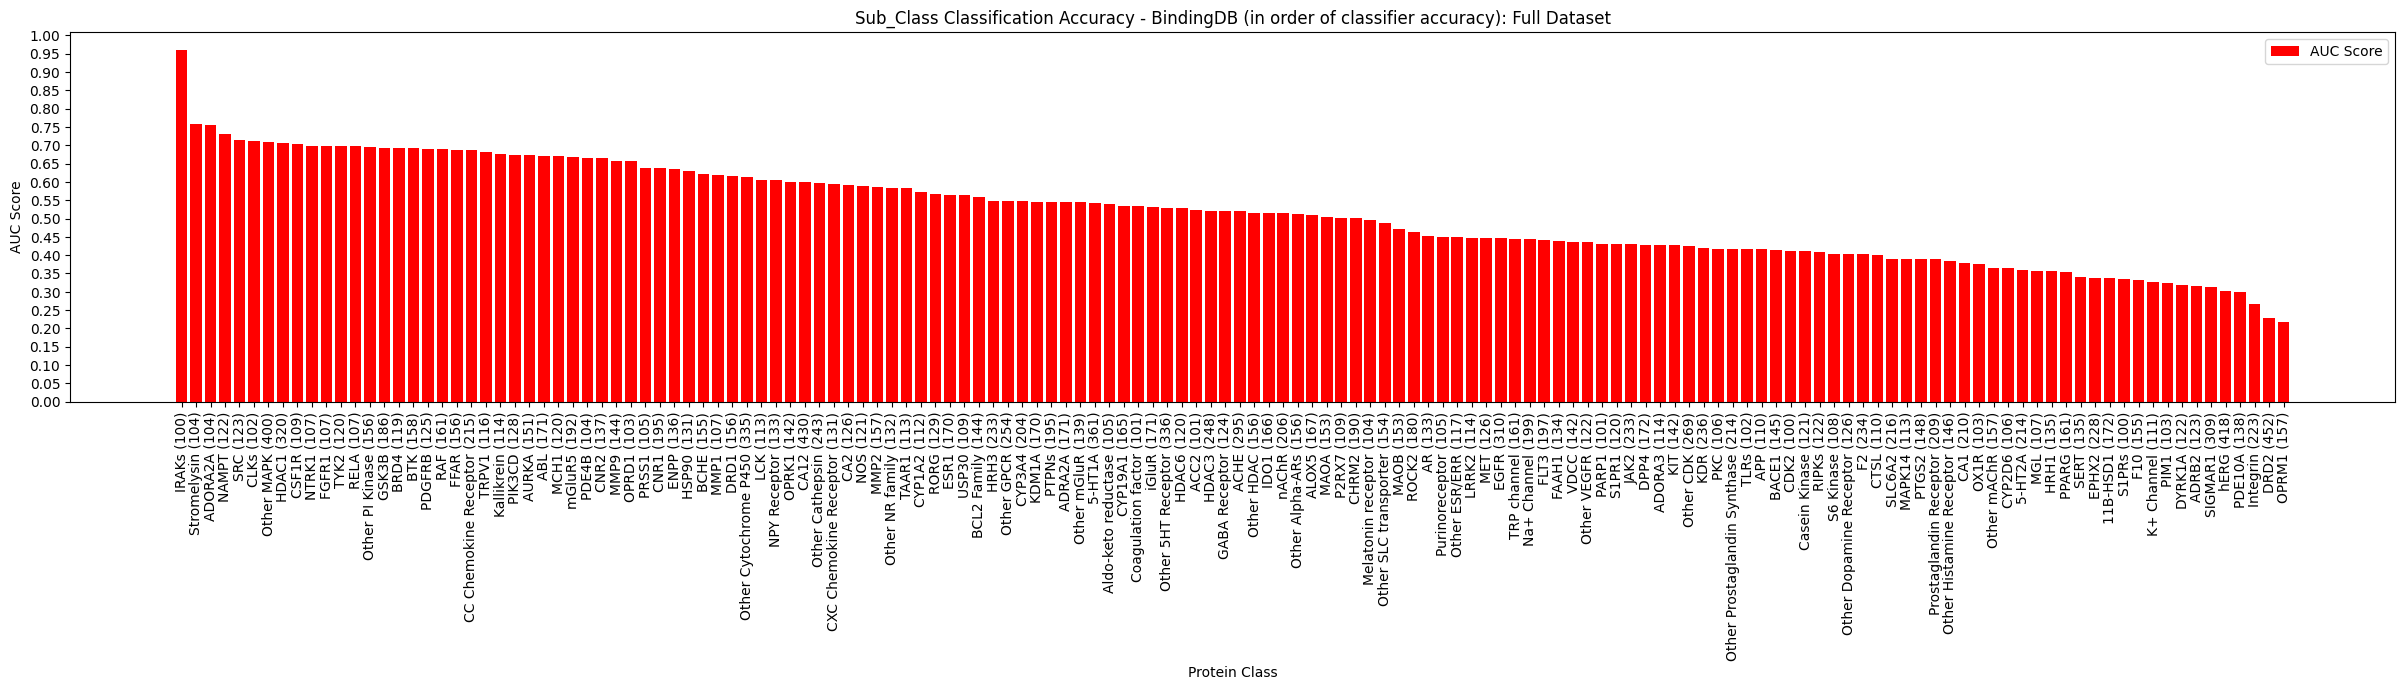

In [217]:
fig = plt.figure()
fig.set_figwidth(30)

plt.bar([x[0] + f" ({min(512, len(bdb_class_to_indices[x[0]]))})" for x in fullAUCs],[x[1] for x in fullAUCs],label="AUC Score",color="red")

plt.xlabel("Protein Class")
plt.ylabel("AUC Score")
plt.title("Sub_Class Classification Accuracy - BindingDB (in order of classifier accuracy): Full Dataset")
plt.xticks(rotation=90, ha='center')
plt.yticks(np.arange(0, 1.05, 0.05))

plt.legend()
plt.show()

In [218]:
bdb["IRAKs"]

0        0.308344
1        0.141144
2        0.346817
3        0.398793
4        0.084402
           ...   
40743    0.455945
40744    0.363322
40745    0.187295
40746    0.431679
40747    0.040681
Name: IRAKs, Length: 40748, dtype: float32

In [198]:
bdb

,Ligand SMILES,Ligand InChI,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,Sub_Class,USP30,NAMPT,CA12,ACC2,PDE10A,...,Purinoreceptor,PDE4B,EGFR,TLRs,Coagulation factor,AURKA,CYP3A4,SRC,Other GPCR,Other NR family
0,Cc1ccc(COc2ccc3nc([C@@H]4[C@H](C(O)=O)C4(C)C)n...,InChI=1S/C27H25BrFN3O3/c1-15-4-7-18(30-12-15)1...,Arachidonate 5-lipoxygenase activating protein,A0A087WW23,Arachidonate,0.981117,0.836257,0.092342,0.034381,0.004338,...,0.003030,0.977380,0.004526,0.025181,0.274715,0.858286,0.946611,0.947008,0.643486,0.004599
1,COC(=O)c1nn(C(=O)c2cccc(C)c2)c2ccc(cc12)[N+]([...,InChI=1S/C17H13N3O5/c1-10-4-3-5-11(8-10)16(21)...,Chymotrypsinogen B,A0A2R8YG87,Chymotrypsinogen,0.977845,0.743272,0.001767,0.023400,0.008419,...,0.025906,0.902498,0.011543,0.394300,0.708011,0.959008,0.887920,0.795088,0.963395,0.167167
2,[CH2][C@H]1C[C@H](C[C@@H]1O)n1ccc2c(ncnc12)-c1...,InChI=1S/C21H21N4O2/c1-12-7-14(10-19(12)26)25-...,Ubiquitin-like modifier-activating enzyme 6,A0AVT1,Ubiquitin-like,0.991587,0.535133,0.004466,0.004401,0.005963,...,0.011476,0.573719,0.019222,0.007360,0.709565,0.972516,0.992911,0.995228,0.971259,0.009318
3,NS(=O)(=O)OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1cn...,"InChI=1S/C19H22N6O6S/c20-32(28,29)30-7-13-15(2...",Ubiquitin-like modifier-activating enzyme 6,A0AVT1,Ubiquitin-like,0.237398,0.165973,0.010372,0.122003,0.007707,...,0.024589,0.333452,0.005882,0.113013,0.762458,0.499517,0.656710,0.880866,0.450632,0.004381
4,Nc1ncnc2n(cnc12)[C@@H]1O[C@H](COP(O)(=O)OP(O)(...,InChI=1S/C15H23N5O14P2/c16-12-7-13(18-3-17-12)...,ADP-ribose glycohydrolase MACROD2,A1Z1Q3,ADP-ribose,0.261537,0.033816,0.108275,0.115792,0.012288,...,0.007700,0.320685,0.038953,0.325067,0.577568,0.113227,0.510062,0.358681,0.057433,0.009008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40743,CN(C)c1ccc(\C=C\c2nc3ccccc3s2)cc1,InChI=1S/C17H16N2S/c1-19(2)14-10-7-13(8-11-14)...,Nuclear receptor coactivator 3,Q9Y6Q9,Nuclear coactivator,0.991017,0.312015,0.001329,0.021151,0.010371,...,0.013697,0.659277,0.008142,0.493629,0.571581,0.595727,0.932768,0.890039,0.923917,0.241011
40744,ClCC(=O)N(C(C(=O)NC1CCCCC1)c1cccnc1)c1cccc(Cl)c1,InChI=1S/C21H23Cl2N3O2/c22-13-19(27)26(18-10-4...,Nuclear receptor coactivator 3,Q9Y6Q9,Nuclear coactivator,0.990955,0.061415,0.025530,0.143168,0.048214,...,0.001207,0.949005,0.003983,0.224055,0.805431,0.893064,0.919753,0.209407,0.845004,0.241530
40745,N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CO)C(=O)N[C@@H]...,InChI=1S/C20H28N4O9/c21-12(8-11-4-2-1-3-5-11)1...,Lymphocyte antigen 96,Q9Y6Y9,Lymphocyte,0.890872,0.026524,0.168847,0.135111,0.718479,...,0.060330,0.086766,0.098227,0.441417,0.105863,0.680532,0.651309,0.553877,0.208698,0.469291
40746,Cl.Cl.Cl.Cl.CC(C)(C)c1cc2Cc3cc(cc(Cc4cc(cc(Cc5...,"InChI=1S/C64H100N12O4/c1-61(2,3)49-33-41-29-43...",Lymphocyte antigen 96,Q9Y6Y9,Lymphocyte,0.336895,0.535018,0.025269,0.082665,0.010377,...,0.035462,0.547802,0.026189,0.091057,0.340840,0.389805,0.576057,0.702906,0.139318,0.087008


In [199]:
bdb.to_csv("BindingDBPredictionsUniProt.csv")

In [200]:
#saving = ['Carbonic', 'Monoglyceride', 'Free', 'Integrin', 'Nitric', 'Aromatase', '11-beta-hydroxysteroid', 'Androgen']
#save_indices = [classes_of_interest.index(i) for i in saving]
save_indices = indices

In [22]:
import pickle

In [23]:
with open("CA2.pkl", 'wb') as file:
    pickle.dump(mdls[0], file)

In [25]:
ligands_other

[[462,
  1326,
  1851,
  2134,
  2209,
  2918,
  4308,
  4877,
  4905,
  5821,
  6321,
  6900,
  7716,
  7950,
  9331,
  9563,
  10646,
  10722,
  11617,
  12133,
  13016,
  15876,
  17128,
  18612,
  21673,
  22464,
  22612,
  22721,
  24297,
  24709,
  25446,
  26236,
  28929,
  28988,
  29078,
  30453,
  30760,
  32578,
  32585,
  32661,
  32688,
  32754,
  33156,
  33579,
  34294,
  35802,
  36042,
  36358,
  36848,
  38125]]

In [24]:
ligands_of_interest

[[6535,
  6548,
  6591,
  6555,
  6543,
  6559,
  6575,
  6528,
  6527,
  6581,
  6542,
  6603,
  6618,
  6628,
  6560,
  6510,
  6503,
  6511,
  6573,
  6617,
  6517,
  6521,
  6507,
  6514,
  6518,
  6620,
  6525,
  6615,
  6565,
  6566,
  6616,
  6553,
  6523,
  6583,
  6562,
  6552,
  6515,
  6604,
  6569,
  6612,
  6611,
  6547,
  6563,
  6590,
  6554,
  6530,
  6540,
  6625,
  6594,
  6614]]

In [202]:
for i in save_indices:
    with open(f"{classes_of_interest[i]}.pkl", 'wb') as file:
        pickle.dump(mdls[i], file)

FileNotFoundError: [Errno 2] No such file or directory: 'Other ESR/ERR.pkl'

In [53]:
np.save("ca12_predictions.npy", ca12_predictions)

In [122]:
bdb_class_to_indices["Potassium voltage-gated channel subfamily H member 2"]

KeyError: 'Potassium voltage-gated channel subfamily H member 2'

In [123]:
ssc = bdb["UniProt (SwissProt) Recommended Name of Target Chain"].tolist()

In [124]:
len([x for x in ssc if x == "Potassium voltage-gated channel subfamily H member 2"])

418

In [220]:
classes_of_interest

['DRD2',
 'CA12',
 'hERG',
 'Other MAPK',
 '5-HT1A',
 'Other 5HT Receptor',
 'Other Cytochrome P450',
 'HDAC1',
 'EGFR',
 'SIGMAR1',
 'ACHE',
 'Other CDK',
 'Other GPCR',
 'HDAC3',
 'Other Cathepsin',
 'KDR',
 'F2',
 'JAK2',
 'HRH3',
 'EPHX2',
 'Integrin',
 'SLC6A2',
 'CC Chemokine Receptor',
 '5-HT2A',
 'Other Prostaglandin Synthase',
 'CA1',
 'Prostaglandin Receptor',
 'nAChR',
 'CYP3A4',
 'Na+ Channel',
 'FLT3',
 'CNR1',
 'PTPNs',
 'mGluR5',
 'CHRM2',
 'GSK3B',
 'ROCK2',
 '11B-HSD1',
 'DPP4',
 'iGluR',
 'ABL',
 'ADRA2A',
 'ESR1',
 'KDM1A',
 'ALOX5',
 'IDO1',
 'CYP19A1',
 'RAF',
 'PPARG',
 'TRP channel',
 'BTK',
 'Other mAChR',
 'MMP2',
 'OPRM1',
 'Other Alpha-ARs',
 'DRD1',
 'FFAR',
 'Other HDAC',
 'Other PI Kinase',
 'F10',
 'BCHE',
 'Other SLC transporter',
 'MAOA',
 'MAOB',
 'AURKA',
 'PTGS2',
 'Other Histamine Receptor',
 'BACE1',
 'MMP9',
 'BCL2 Family',
 'KIT',
 'OPRK1',
 'VDCC',
 'Other mGluR',
 'PDE10A',
 'CNR2',
 'ENPP',
 'HRH1',
 'SERT',
 'FAAH1',
 'AR',
 'NPY Receptor',
 

In [221]:
classes_of_interest[-1]

'IRAKs'

In [223]:
ligands_other[-1]

[135,
 560,
 1757,
 1842,
 1934,
 2864,
 2891,
 3320,
 3347,
 3698,
 3708,
 3807,
 3810,
 4100,
 4215,
 5506,
 5583,
 7580,
 8025,
 8201,
 8387,
 10204,
 10595,
 11006,
 11156,
 11434,
 11855,
 13158,
 13508,
 13528,
 13810,
 13843,
 14846,
 15697,
 15764,
 16924,
 17101,
 17699,
 17703,
 19730,
 20149,
 20616,
 20704,
 20908,
 21415,
 21596,
 21767,
 21877,
 21894,
 22289,
 22341,
 22370,
 22541,
 22648,
 23829,
 24040,
 24322,
 25257,
 25349,
 25654,
 26092,
 26206,
 26502,
 26749,
 26969,
 27123,
 27245,
 27651,
 29081,
 29637,
 30471,
 30595,
 30947,
 31572,
 32252,
 32525,
 32585,
 33058,
 33140,
 33557,
 33743,
 34096,
 34417,
 34436,
 34482,
 34883,
 35084,
 35187,
 35492,
 35572,
 36240,
 37293,
 37697,
 37823,
 38481,
 38558,
 40084,
 40137,
 40202,
 40588]

In [243]:
joe = [len(set([bdb_classes[i] for i in j])) for j in ligands_other]

In [245]:
sorted(joe)

[372,
 376,
 377,
 378,
 378,
 380,
 380,
 381,
 381,
 382,
 384,
 384,
 385,
 385,
 385,
 386,
 387,
 388,
 389,
 389,
 389,
 389,
 389,
 389,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 391,
 391,
 391,
 391,
 392,
 392,
 392,
 392,
 393,
 393,
 393,
 393,
 394,
 394,
 394,
 394,
 394,
 395,
 395,
 395,
 395,
 396,
 396,
 396,
 396,
 396,
 396,
 396,
 397,
 397,
 397,
 397,
 397,
 398,
 398,
 398,
 398,
 398,
 399,
 399,
 399,
 399,
 399,
 399,
 399,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 401,
 401,
 401,
 401,
 401,
 402,
 402,
 402,
 402,
 402,
 402,
 402,
 403,
 403,
 403,
 403,
 404,
 404,
 404,
 405,
 405,
 405,
 405,
 405,
 406,
 406,
 406,
 406,
 407,
 407,
 407,
 407,
 407,
 407,
 408,
 408,
 408,
 408,
 408,
 409,
 410,
 410,
 410,
 410,
 411,
 411,
 412,
 412,
 414,
 415,
 415,
 415,
 416,
 416,
 419,
 422,
 423,
 424]

In [2]:
#qsub -t 1:1 embeddings_test.qsub
from miniautoml import train_binary_classifier
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#import umap.umap_ as umap
from sklearn.metrics import roc_auc_score
import os
import datetime
import pickle


bdb = pd.read_csv("../BindingDB/filtered_bdb_new_subclasses_3_14_25.csv")
#bdb = pd.read_csv("../BindingDB/HeavyBDB.csv")
bdb_smiles = bdb["Ligand SMILES"].tolist()
bdb_classes = bdb["Sub_Class"].tolist()
bdb_types = set(bdb_classes)
bdb_class_to_indices = {x:list() for x in bdb_types}
for i, val in enumerate(bdb_classes):
    bdb_class_to_indices[val].append(i)

with open("heavydiverse100.pkl", 'rb') as file:
    diverse50 = pickle.load(file)

print("READINGS EMBEDDINGS")
embeddings = np.load("../BindingDB/final_bdb_embed.npy").tolist()
#embeddings = np.load("../BindingDB/heavy_bdb_embed.npy").tolist()

dimred = "RAW" #RAW, PCA, UMAP, TSNE
filename = "aug6output"+dimred+".txt"

current_time = datetime.datetime.now()
with open(filename, "w") as file:
    file.write(current_time.strftime("%D:%H:%M:%S") + ": embeddings processed\n")

bdb_total = {x:0 for x in bdb_types}
for x in bdb_classes:
    bdb_total[x] += 1

order = sorted(bdb_total.items(), key=lambda x: -x[1])
#classes_of_interest = ["USP30", "ACC2", "FFAR", "CA2", "NAMPT"]
classes_of_interest = ["CA12"]
#task_id = int(os.getenv("SGE_TASK_ID")) - 1
task_id = 0

newdb = pd.read_csv("../BindingDB/filtered_bdb_new_subclasses_3_14_25.csv")
#newdb = pd.read_csv("../BindingDB/HeavyBDB.csv")

for class_of_interest in classes_of_interest:
    '''
    print("STARTING SAMPLING")
    ligands_of_interest = bdb_class_to_indices[class_of_interest]
    ligands_other = sorted(random.sample(list(set(range(len(bdb_smiles)))-set(ligands_of_interest)), 100)) 
    #ligands_of_interest = random.sample(ligands_of_interest, 100)
    ligands_of_interest = diverse50[class_of_interest]
    print(ligands_other)
    print(ligands_of_interest)

    X = []
    Y = []
    for i in ligands_of_interest:
        X.append(embeddings[i])
        Y.append(1)
    for i in ligands_other:
        X.append(embeddings[i])
        Y.append(0)
    X = np.array(X)
    Y = np.array(Y)

    print("TRAINING MODELS")
    mdl = train_binary_classifier(X, Y, n_splits=0)
    print(f"{class_of_interest}, self-AUC {mdl.validation_metrics['aucs']}")
    
    with open(f"{class_of_interest}.pkl", 'wb') as file:
        pickle.dump(mdl, file)
'''
    print("TESTING MODELS")
    with open("CA12.pkl", 'rb') as file:
        mdl = pickle.load(file)
    batch_size = 1024
    batch_predictions = []
    for j in range(0, len(embeddings)//batch_size+1):
        batch_predictions.append(mdl.predict(embeddings[batch_size*j:batch_size*(j+1)]))
        print(f"{class_of_interest}: Batch {j}")
    prediction = np.concatenate(batch_predictions)
    current_time = datetime.datetime.now()
    print(current_time.strftime("%D:%H:%M:%S"))
    with open(filename, "a") as file:
        file.write(current_time.strftime("%D:%H:%M:%S") + ": prediction of " + class_of_interest + " complete\n")

    auc_score = roc_auc_score([1 if x == class_of_interest else 0 for x in bdb_classes], prediction)
    print(f"Test AUC: {auc_score}")

    cutoff = len(embeddings) // 100 #len(bdb_class_to_indices["CA12"])
    correct = len([x for x in sorted(range(len(bdb_classes)), key=lambda i: prediction[i])[-cutoff:] if bdb_classes[x] == class_of_interest])
    lift = correct*len(bdb_classes)/(cutoff*len(bdb_class_to_indices[class_of_interest]))
    print(f"Lift: {lift}")

    newdb[class_of_interest] = prediction

newdb.to_csv("Aug6"+dimred+"Run" + str(task_id) + ".csv", index=False)


READINGS EMBEDDINGS
TESTING MODELS
CA12: Batch 0
CA12: Batch 1
CA12: Batch 2
CA12: Batch 3
CA12: Batch 4
CA12: Batch 5
CA12: Batch 6
CA12: Batch 7
CA12: Batch 8
CA12: Batch 9
CA12: Batch 10
CA12: Batch 11
CA12: Batch 12
CA12: Batch 13
CA12: Batch 14
CA12: Batch 15
CA12: Batch 16
CA12: Batch 17
CA12: Batch 18
CA12: Batch 19
CA12: Batch 20
CA12: Batch 21
CA12: Batch 22
CA12: Batch 23
CA12: Batch 24
CA12: Batch 25
CA12: Batch 26
CA12: Batch 27
CA12: Batch 28
CA12: Batch 29
CA12: Batch 30
CA12: Batch 31
CA12: Batch 32
CA12: Batch 33
CA12: Batch 34
CA12: Batch 35
CA12: Batch 36
CA12: Batch 37
CA12: Batch 38
CA12: Batch 39
08/06/25:16:42:37
Test AUC: 0.9113309076562262
Lift: 25.14590023427233


In [63]:
import re

In [77]:
inspect = sorted(sorted([(bdb_smiles[i], prediction[i]) for i in range(len(prediction))], key=lambda x:-x[1])[:3000], key=lambda x:len(re.findall("[a-zA-Z]", x[0])))

In [78]:
inspect

[('[C-]#N', 0.91551614),
 ('[O-]C#N', 0.92948174),
 ('[N-]=C=O', 0.8976111),
 ('[O-][N+]#[C-]', 0.8820706),
 ('[O-][V](=O)=O', 0.8800341),
 ('NCCC#N', 0.97078586),
 ('NCCC#N', 0.97078586),
 ('[O-]P([O-])([O-])=O', 0.9087523),
 ('NS(O)(=O)=O', 0.88350385),
 ('NNC(N)=N', 0.8832383),
 ('N#CN1CCC1', 0.92913973),
 ('c1ccccc1', 0.92508143),
 ('NS(=O)(=O)NO', 0.9189207),
 ('OCC(O)C=O', 0.8865234),
 ('NCCCP(=O)=O', 0.96537274),
 ('NCCCCCN', 0.9647368),
 ('NCCS(N)(=O)=O', 0.9631477),
 ('NCCCC(O)=O', 0.95440394),
 ('NCCCC(O)=O', 0.95440394),
 ('N#CN1CCCC1', 0.9168209),
 ('NC(N)C1=NCC1', 0.9049909),
 ('Nc1ccccn1', 0.90272796),
 ('NNc1ccccc1', 0.9567311),
 ('Oc1ccc(O)cc1', 0.9554341),
 ('CC(CCN)P(O)=O', 0.954842),
 ('CP(O)(=O)CCCN', 0.95473194),
 ('OCCCNC([S-])=S', 0.94848025),
 ('NCc1cc(O)no1', 0.94690007),
 ('CC(CN)CP(O)=O', 0.94375765),
 ('CC(C)OS(N)(=O)=O', 0.9375475),
 ('Cc1ccc(N)cc1', 0.93630695),
 ('NCCc1cccs1', 0.9348154),
 ('CS(=O)CC(N)CS', 0.93211937),
 ('NCCc1ccsc1', 0.92699766),
 ('CC1

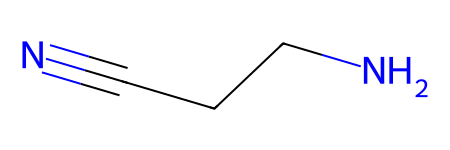

In [80]:
Chem.MolFromSmiles(inspect[5][0])